In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# Autoencoder
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(encoded)
output = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, output)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0725 - val_loss: 0.0228
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0214 - val_loss: 0.0182
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0179 - val_loss: 0.0160
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0156 - val_loss: 0.0151
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0144 - val_loss: 0.0138
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0140 - val_loss: 0.0131
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0128 - val_loss: 0.0126
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0124 - val_loss: 0.0122
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0120 - val_loss: 0.0118
Epoch 10/10
235/235 ━━━━━━━━━

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train[..., None] / 255.0
x_test = x_test[..., None] / 255.0

input_img = tf.keras.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, 3, activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(16, 3, activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D(2, padding='same')(x)

# Decoder
x = layers.Conv2D(16, 3, activation='relu', padding='same')(encoded)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.UpSampling2D(2)(x)
decoded = layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)

conv_autoencoder = models.Model(input_img, decoded)
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 113s 236ms/step - loss: 0.3669 - val_loss: 0.2794
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 107s 228ms/step - loss: 0.2744 - val_loss: 0.2727
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 231ms/step - loss: 0.2701 - val_loss: 0.2693
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 232ms/step - loss: 0.2670 - val_loss: 0.2669
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 228ms/step - loss: 0.2646 - val_loss: 0.2650
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 230ms/step - loss: 0.2624 - val_loss: 0.2637
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 238ms/step - loss: 0.2618 - val_loss: 0.2624
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 110s 234ms/step - loss: 0.2601 - val_loss: 0.2619
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 107s 228ms/step - loss: 0.2594 - val_loss: 0.2614
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 229ms/step - loss: 0.2583 - val_loss: 0.2602


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


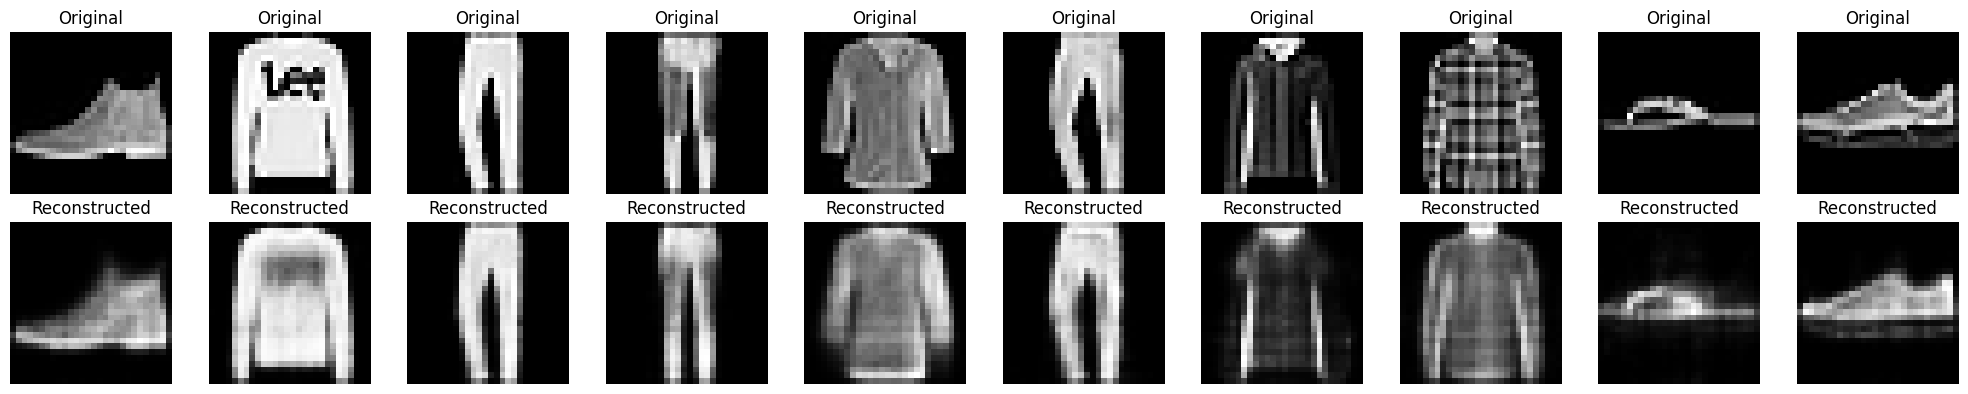

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape test images to flat vectors
x_test_flat = x_test.reshape((-1, 784))

# Reconstruct test images
decoded_imgs = autoencoder.predict(x_test_flat)

# Number of images to display
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Use same conv_autoencoder structure
denoising_autoencoder = models.clone_model(conv_autoencoder)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
denoising_autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, validation_data=(x_test_noisy, x_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 231ms/step - loss: 0.4119 - val_loss: 0.3163
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 231ms/step - loss: 0.3118 - val_loss: 0.3101
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 234ms/step - loss: 0.3072 - val_loss: 0.3077
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 234ms/step - loss: 0.3047 - val_loss: 0.3052
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 231ms/step - loss: 0.3027 - val_loss: 0.3035
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 107s 228ms/step - loss: 0.3012 - val_loss: 0.3022
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 231ms/step - loss: 0.2993 - val_loss: 0.3014
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 231ms/step - loss: 0.2989 - val_loss: 0.3011
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 234ms/step - loss: 0.2980 - val_loss: 0.3000
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 113s 241ms/step - loss: 0.2978 - val_loss: 0.2999


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


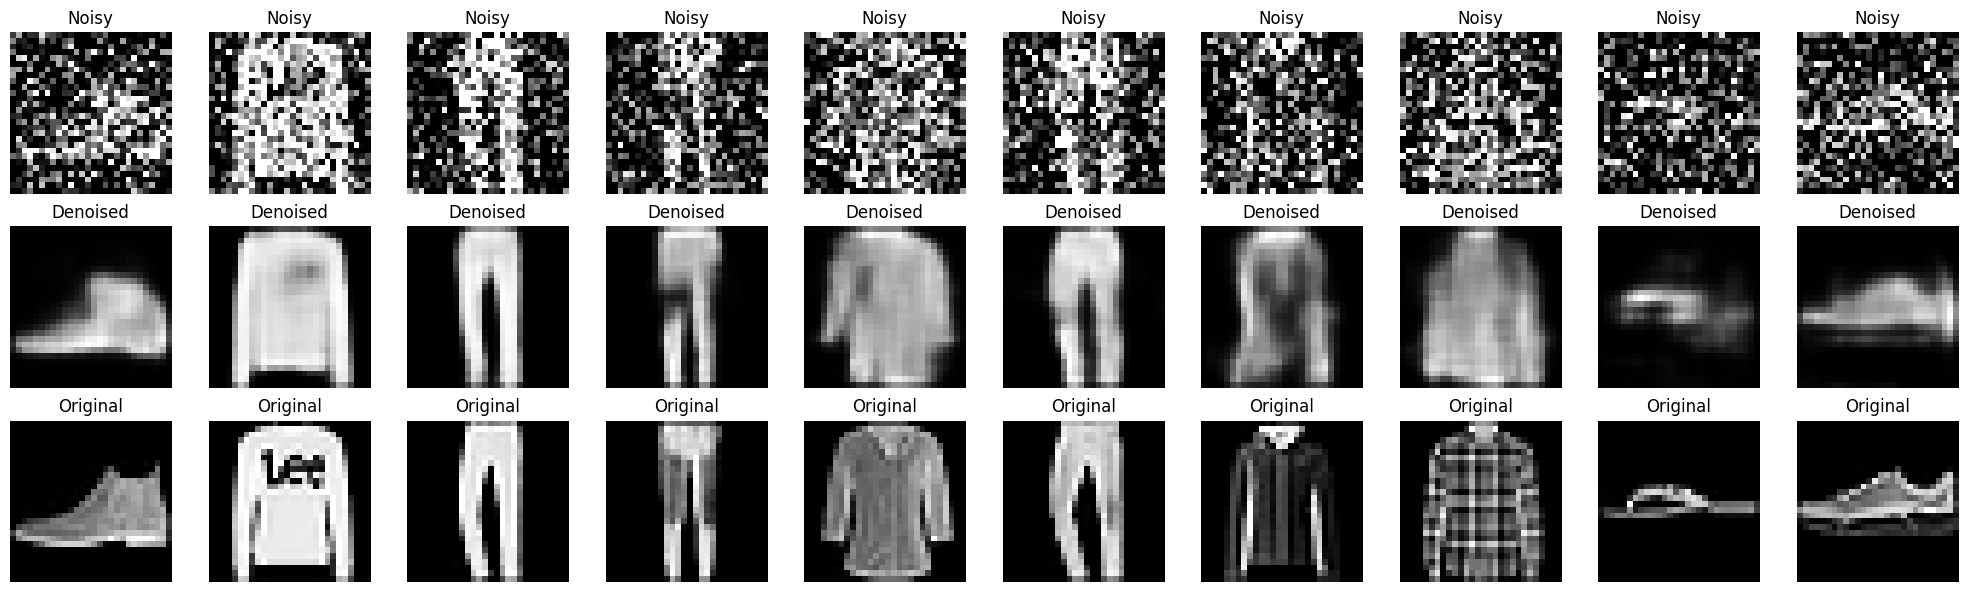

In [ ]:
import matplotlib.pyplot as plt

# Predict denoised images
denoised_imgs = denoising_autoencoder.predict(x_test_noisy)

# Number of samples to show
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # Noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    # Denoised image (output)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis("off")

    # Original clean image (ground truth)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, _), (_, _) = cifar10.load_data()
x_train = (x_train - 127.5) / 127.5

def make_generator():
    model = tf.keras.Sequential([
        layers.Dense(8*8*256, input_shape=(100,)),
        layers.Reshape((8, 8, 256)),
        layers.Conv2DTranspose(128, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2DTranspose(64, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2DTranspose(3, 3, activation='tanh', padding='same')
    ])
    return model

def make_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, 4, strides=2, padding='same', input_shape=(32, 32, 3)),
        layers.LeakyReLU(0.2),
        layers.Conv2D(128, 4, strides=2, padding='same'),
        layers.LeakyReLU(0.2),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

generator = make_generator()
discriminator = make_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Combined GAN
z = layers.Input(shape=(100,))
img = generator(z)
discriminator.trainable = False
valid = discriminator(img)

gan = tf.keras.Model(z, valid)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Training loop (simplified)
import tqdm

batch_size = 128
for epoch in range(5000):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]

    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((batch_size, 1)))

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Exception ignored in: <function _xla_gc_callback at 0x7dec248036a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


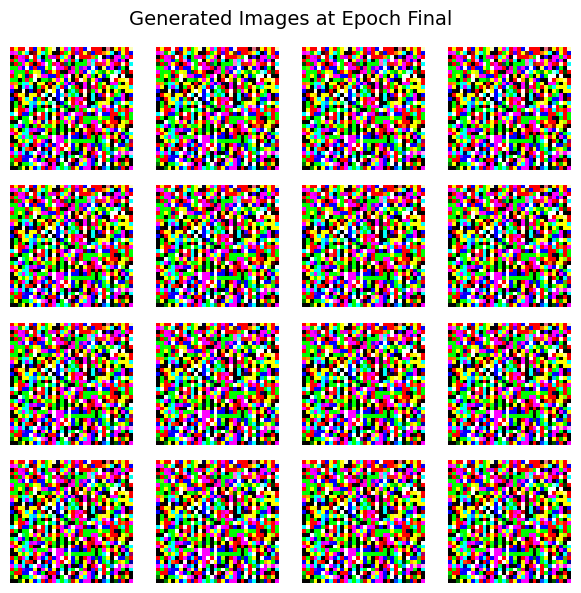

In [ ]:
import matplotlib.pyplot as plt

def plot_generated_images(generator, epoch, examples=16, dim=(4, 4), figsize=(6, 6)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)

    generated_images = 0.5 * generated_images + 0.5  # Rescale from [-1, 1] to [0, 1]

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.suptitle(f"Generated Images at Epoch {epoch}", fontsize=14)
    plt.tight_layout()
    plt.show()
plot_generated_images(generator, epoch='Final')


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Load and preprocess the Fashion MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)  # Shape: (N, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# Sampling layer for the VAE reparameterization trick
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Encoder network
latent_dim = 2

encoder_inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])

encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Decoder network
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, strides=2, padding="same", activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, strides=2, padding="same", activation="relu")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)

decoder = models.Model(latent_inputs, decoder_outputs, name="decoder")

# VAE model
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        return self.decoder(z)

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
            )
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss
        }

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)
        reconstruction_loss = tf.reduce_mean(
            tf.reduce_sum(
                tf.keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
            )
        )
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        )
        total_loss = reconstruction_loss + kl_loss
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss
        }

# Instantiate and compile the VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam())

# Train the VAE
vae.fit(x_train, epochs=20, batch_size=128, validation_data=(x_test, None))


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 106s 216ms/step - kl_loss: 4.2627 - loss: 334.0372 - reconstruction_loss: 329.7744 - val_kl_loss: 3.9832 - val_loss: 290.8117 - val_reconstruction_loss: 286.8286
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 146s 224ms/step - kl_loss: 4.2312 - loss: 296.9357 - reconstruction_loss: 292.7045 - val_kl_loss: 5.6960 - val_loss: 274.1109 - val_reconstruction_loss: 268.4149
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 223ms/step - kl_loss: 6.0072 - loss: 274.8026 - reconstruction_loss: 268.7954 - val_kl_loss: 6.5347 - val_loss: 257.7507 - val_reconstruction_loss: 251.2160
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 230ms/step - kl_loss: 6.0084 - loss: 268.4519 - reconstruction_loss: 262.4436 - val_kl_loss: 6.5508 - val_loss: 255.8483 - val_reconstruction_loss: 249.2975
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 101s 216ms/step - kl_loss: 6.0249 - loss: 266.4713 - reconstruction_loss: 260.4464 - val_kl_loss: 6.4196 - val_loss: 256.7975 - val_reconstruction_loss:

In [ ]:
import openai
from IPython.display import Audio
openai.api_key = "YOUR_API_KEY"

# Chat Completion
response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[{"role": "user", "content": "Describe a fantasy landscape for a DALL·E image"}]
)
description = response['choices'][0]['message']['content']

# Image Generation
image_resp = openai.Image.create(
    prompt=description,
    n=1,
    size="512x512"
)
image_url = image_resp['data'][0]['url']

# Text-to-Speech
tts_response = openai.Audio.create(
    model="tts-1",
    voice="alloy",
    input=description
)

# Save and play audio
with open("description.mp3", "wb") as f:
    f.write(tts_response.content)

Audio("description.mp3")
